The correlation between mouse weight and average tumor volume is: 0.9285785182288726

 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [92]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is: {total_mice}')



Number of mice in all the treatment regimens is: 249


In [94]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

In [102]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_all_data = merged_data_df[merged_data_df["Mouse ID"] == "g989"]
dup_mouse_id_all_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [140]:
# Checking the number of mice in the clean DataFrame.
len( merged_data_df["Mouse ID"].unique())

249

## Summary Statistics

In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

means =  merged_data_df.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
medians =  merged_data_df.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
variances =  merged_data_df.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
stdevs =  merged_data_df.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
sems =  merged_data_df.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": means,
    "Median Tumor Volume (mm3)": medians,
    "Tumor Volume (mm3) Variance": variances,
    "Tumor Volume (mm3) Standard Deviation": stdevs,
    "Tumor Volume (mm3) SEM": sems,
})
summary_statistics_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [146]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
merged_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

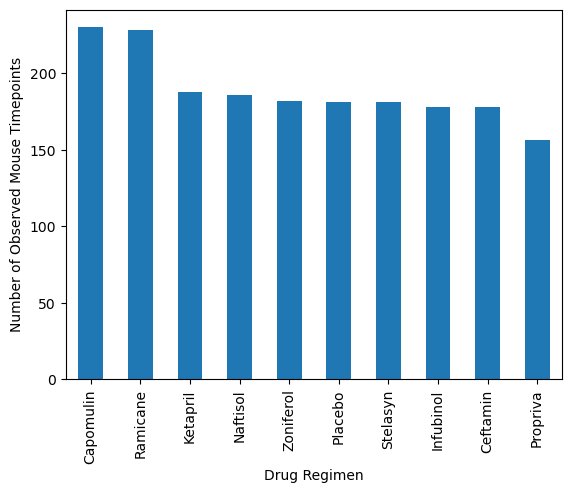

In [228]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts() # Count the mice using each drug 
plot_pandas = mice_count.plot.bar(color = 'tab:blue') # Choosing the bar graph with blue bars
plt.xlabel("Drug Regimen") # Name the x-axis
plt.ylabel("Number of Observed Mouse Timepoints") # Name the y-axis


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

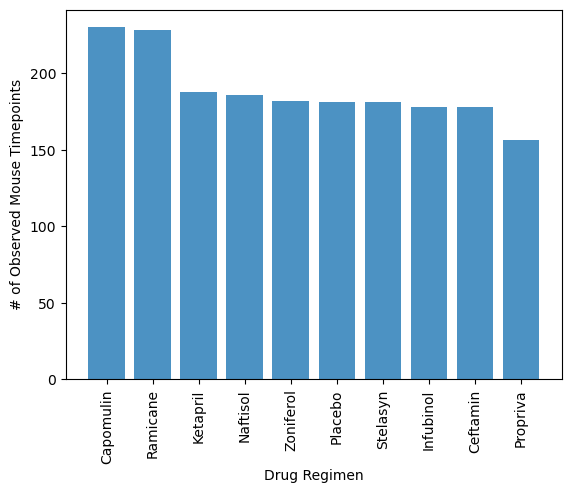

In [232]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'tab:blue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

Text(0, 0.5, 'Sex Proportion')

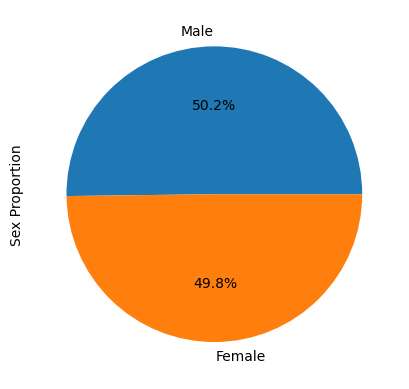

In [252]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_counts = mouse_metadata.Sex.value_counts()

# Make the pie chart
mouse_sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex Proportion")

Text(0, 0.5, 'Sex Proportion')

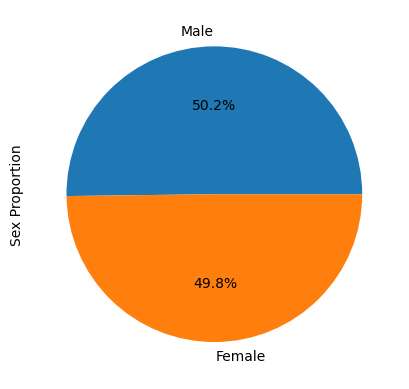

In [258]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex_counts = mouse_metadata.Sex.value_counts()

# Make the pie chart
plt.pie(mouse_sex_counts.values, labels = mouse_sex_counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex Proportion")


## Quartiles, Outliers and Boxplots

In [312]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                          (clean_df["Drug Regimen"] == "Ramicane") |
                          (clean_df["Drug Regimen"] == "Infubinol") |
                          (clean_df["Drug Regimen"] == "Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
regimen_last_group = regimen_df.groupby("Mouse ID").max()["Timepoint"]
# print(regimen_last_group.head())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_last_df = pd.merge(regimen_last_group, clean_df, on=("Mouse ID", "Timepoint"), how='left')

# html = regimen_last_df.head().to_html()
# print(html)
regimen_last_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [314]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create list to fill with tumor vol data (for plotting)
tumor_data = []

for regimen in labels:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = regimen_last_df.loc[regimen_last_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    # Add this data frame to the list
    tumor_data.append(tumor_df)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{regimen} outliers could be below {lower_bound:.2f} mm3 or above {upper_bound:.2f} mm3")    

Capomulin outliers could be below 20.70 mm3 or above 51.83 mm3
Ramicane outliers could be below 17.91 mm3 or above 54.31 mm3
Infubinol outliers could be below 36.83 mm3 or above 82.74 mm3
Ceftamin outliers could be below 25.36 mm3 or above 87.67 mm3


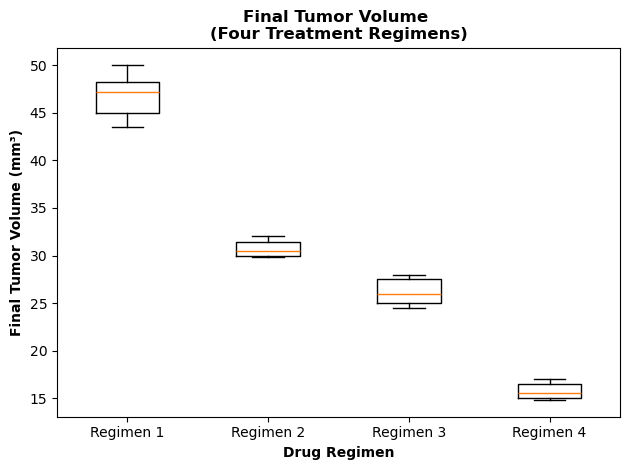

In [464]:
import matplotlib.pyplot as plt
import os

# Example data for final tumor volumes for each regimen
final_tumor_vol_list = [
    [45.0, 47.2, 43.5, 50.1, 48.3],  # Tumor volumes for regimen 1
    [30.5, 32.1, 29.8, 31.4, 30.0],  # Tumor volumes for regimen 2
    [25.0, 27.5, 26.0, 24.5, 28.0],  # Tumor volumes for regimen 3
    [15.0, 16.5, 14.8, 17.0, 15.5]   # Tumor volumes for regimen 4
]

# Labels for the drug regimens
regimen = ['Regimen 1', 'Regimen 2', 'Regimen 3', 'Regimen 4']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, tick_labels=regimen, flierprops={'markerfacecolor':'r', 'markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm³)', fontweight='bold')

# Ensure the 'images' directory exists
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig(os.path.join(output_dir, 'final_tumor_boxplot.png'))

# Present the box plot chart
plt.show()

# Close pyplot (optional)
plt.close()

## Line and Scatter Plots

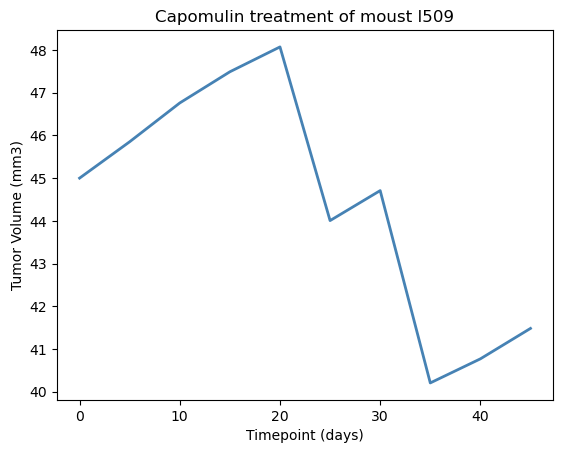

In [324]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:] 
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()

# Format and labels

plt.title('Capomulin treatment of moust l509')
plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue", label = "Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

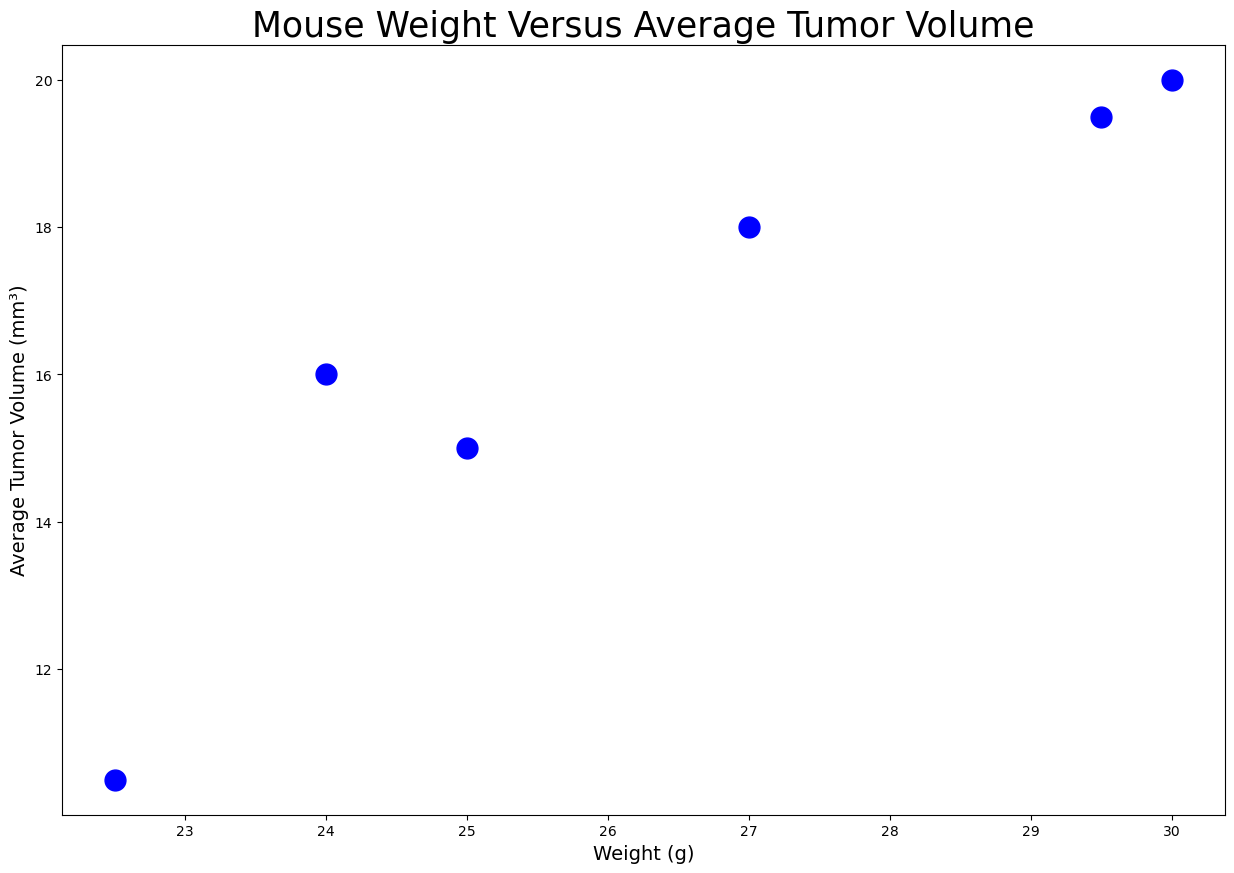

In [472]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
import pandas as pd
import matplotlib.pyplot as plt
import os

# Sample data for Capomulin treatment regimen
data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5', 'm6'],
    'Weight (g)': [25.0, 30.0, 22.5, 27.0, 29.5, 24.0],
    'Tumor Volume (mm3)': [15.0, 20.0, 10.5, 18.0, 19.5, 16.0]
}

# Create a DataFrame
Capomulin_df = pd.DataFrame(data)

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
fig1, ax1 = plt.subplots(figsize=(15, 10))

# Calculate average tumor volume and weight for each mouse in the Capomulin treatment regimen
avg_capm_vol = Capomulin_df.groupby(['Mouse ID']).mean()

# Set marker size
marker_size = 15

# Create scatter plot using ax1
ax1.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], s=marker_size**2, color="blue")

# Set title and labels
ax1.set_title('Mouse Weight Versus Average Tumor Volume', fontsize=25)
ax1.set_xlabel('Weight (g)', fontsize=14)
ax1.set_ylabel('Average Tumor Volume (mm³)', fontsize=14)

# Define the output directory
output_dir = "../Images"

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot to the specified path
plt.savefig(os.path.join(output_dir, 'scatterplot.png'), bbox_inches="tight")

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.9285785182288726


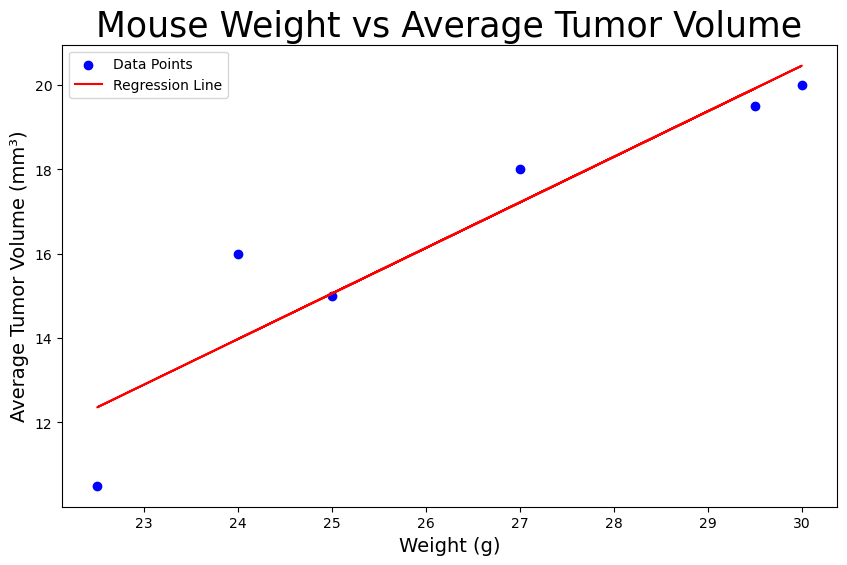

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

# Sample data for Capomulin treatment regimen
data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5', 'm6'],
    'Weight (g)': [25.0, 30.0, 22.5, 27.0, 29.5, 24.0],
    'Tumor Volume (mm3)': [15.0, 20.0, 10.5, 18.0, 19.5, 16.0]
}

# Create a DataFrame
Capomulin_df = pd.DataFrame(data)

# Calculate average weight and average tumor volume
avg_capm_vol = Capomulin_df.groupby(['Mouse ID']).mean()

# Define x and y values
mice_weight_avg = avg_capm_vol['Weight (g)']
mice_tumor_avg = avg_capm_vol['Tumor Volume (mm3)']

# Calculate the correlation
correlation = mice_weight_avg.corr(mice_tumor_avg)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mice_weight_avg, mice_tumor_avg)

# Create regression line data
regression_line = slope * mice_weight_avg + intercept

# Generate a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(mice_weight_avg, mice_tumor_avg, color='blue', label='Data Points')
ax.plot(mice_weight_avg, regression_line, color='red', label='Regression Line')

# Set title and labels
ax.set_title('Mouse Weight vs Average Tumor Volume', fontsize=25)
ax.set_xlabel('Weight (g)', fontsize=14)
ax.set_ylabel('Average Tumor Volume (mm³)', fontsize=14)
ax.legend()

# Show the plot
plt.show()